# 데이터 로드

In [14]:
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글세팅
# 브랜드별 색상 팔레트 지정
colors = {'biobidet':'firebrick', 'brondell': 'coral', 'tushy':'gold', 'toto': 'lightgreen', 'ovedecors':'seagreen', 'alphabidet':'skyblue', 'kohler': 'royalblue', 'bidetmate':'mediumpurple', 'a_s': 'indigo', 'vovo':'black'}
# 채널별 색상 팔레트 지정
channel = {'costco':'black', 'amazon': 'darkgrey', 'build.com':'darkgoldenrod', 'walmart': 'gold', 'hd':'yellow', 'lowes':'orange'}

In [15]:
combined_review_origin = pd.read_excel('../02. Train_Test Data/combined_review.xlsx')
combined_review_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30555 entries, 0 to 30554
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   회사명     30555 non-null  object        
 1   고유 제품명  30555 non-null  object        
 2   형태      30555 non-null  object        
 3   작성일     30555 non-null  datetime64[ns]
 4   별점      30555 non-null  int64         
 5   제목_본문   30555 non-null  object        
 6   채널명     30555 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.6+ MB


In [16]:
sentiment_review_origin = pd.read_excel('../03. 머신러닝_딥러닝/sentiment.xlsx')
sentiment_review_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13090 entries, 0 to 13089
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13090 non-null  int64  
 1   Text         13090 non-null  object 
 2   Label        13090 non-null  int64  
 3   Prediction   13090 non-null  int64  
 4   Probability  13090 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 511.5+ KB


In [17]:
# 카피본 떠놓고 시작하기
combined_review = combined_review_origin.copy()
combined_review.shape

(30555, 7)

In [18]:
# 카피본 떠놓고 시작하기
sentiment_review = sentiment_review_origin.copy()
sentiment_review.shape

(13090, 5)

# 병합

In [19]:
merged_df = pd.merge(combined_review, sentiment_review, left_on='제목_본문', right_on='Text', how='inner')
merged_df

,회사명,고유 제품명,형태,작성일,별점,제목_본문,채널명,Unnamed: 0,Text,Label,Prediction,Probability
0,biobidet,BB A8,E,2019-09-17,5,Very Satisfied....Love the night glow light. V...,lowes,1057,Very Satisfied....Love the night glow light. V...,1,1,0.999418
1,biobidet,BB A8,E,2018-08-05,5,Great product.I bought this product a few week...,lowes,5004,Great product.I bought this product a few week...,1,1,0.999363
2,biobidet,BB A8,E,2022-05-08,5,Great Features and easy installation.I replace...,lowes,5016,Great Features and easy installation.I replace...,1,1,0.999281
3,biobidet,BB A8,E,2017-10-19,5,"great biobidet.thank you for your item , very ...",lowes,1732,"great biobidet.thank you for your item , very ...",1,1,0.999585
4,biobidet,BB A8,E,2016-12-14,5,AMAZING.Performs just as good as the high end ...,lowes,8212,AMAZING.Performs just as good as the high end ...,1,1,0.999463
...,...,...,...,...,...,...,...,...,...,...,...,...
7846,ovedecors,Irenne,E,2022-08-02,5,What an amazing toilet. Don’t wait to get one....,costco,10255,What an amazing toilet. Don’t wait to get one....,1,1,0.999384
7847,ovedecors,Irenne,E,2020-11-30,5,Worked first time!.Easy to set up and install....,costco,7743,Worked first time!.Easy to set up and install....,1,1,0.999372
7848,ovedecors,Irenne,E,2021-11-30,1,Worst product.I just opened the box and parts ...,costco,9949,Worst product.I just opened the box and parts ...,0,0,0.000946
7849,ovedecors,Irenne,E,2022-02-03,5,Worth every penny.We love our new toilet! We h...,costco,2589,Worth every penny.We love our new toilet! We h...,1,1,0.999433


In [20]:
merged_df.drop('Text', axis=1, inplace=True)
merged_df.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
merged_df

,회사명,고유 제품명,형태,작성일,별점,제목_본문,채널명,Label,Prediction,Probability
0,biobidet,BB A8,E,2019-09-17,5,Very Satisfied....Love the night glow light. V...,lowes,1,1,0.999418
1,biobidet,BB A8,E,2018-08-05,5,Great product.I bought this product a few week...,lowes,1,1,0.999363
2,biobidet,BB A8,E,2022-05-08,5,Great Features and easy installation.I replace...,lowes,1,1,0.999281
3,biobidet,BB A8,E,2017-10-19,5,"great biobidet.thank you for your item , very ...",lowes,1,1,0.999585
4,biobidet,BB A8,E,2016-12-14,5,AMAZING.Performs just as good as the high end ...,lowes,1,1,0.999463
...,...,...,...,...,...,...,...,...,...,...
7846,ovedecors,Irenne,E,2022-08-02,5,What an amazing toilet. Don’t wait to get one....,costco,1,1,0.999384
7847,ovedecors,Irenne,E,2020-11-30,5,Worked first time!.Easy to set up and install....,costco,1,1,0.999372
7848,ovedecors,Irenne,E,2021-11-30,1,Worst product.I just opened the box and parts ...,costco,0,0,0.000946
7849,ovedecors,Irenne,E,2022-02-03,5,Worth every penny.We love our new toilet! We h...,costco,1,1,0.999433


In [22]:
merged_df['연도'] = merged_df['작성일'].dt.to_period("Y")
merged_df['분기'] = merged_df['작성일'].dt.to_period("Q")
merged_df

,회사명,고유 제품명,형태,작성일,별점,제목_본문,채널명,Label,Prediction,Probability,연도,분기
0,biobidet,BB A8,E,2019-09-17,5,Very Satisfied....Love the night glow light. V...,lowes,1,1,0.999418,2019,2019Q3
1,biobidet,BB A8,E,2018-08-05,5,Great product.I bought this product a few week...,lowes,1,1,0.999363,2018,2018Q3
2,biobidet,BB A8,E,2022-05-08,5,Great Features and easy installation.I replace...,lowes,1,1,0.999281,2022,2022Q2
3,biobidet,BB A8,E,2017-10-19,5,"great biobidet.thank you for your item , very ...",lowes,1,1,0.999585,2017,2017Q4
4,biobidet,BB A8,E,2016-12-14,5,AMAZING.Performs just as good as the high end ...,lowes,1,1,0.999463,2016,2016Q4
...,...,...,...,...,...,...,...,...,...,...,...,...
7846,ovedecors,Irenne,E,2022-08-02,5,What an amazing toilet. Don’t wait to get one....,costco,1,1,0.999384,2022,2022Q3
7847,ovedecors,Irenne,E,2020-11-30,5,Worked first time!.Easy to set up and install....,costco,1,1,0.999372,2020,2020Q4
7848,ovedecors,Irenne,E,2021-11-30,1,Worst product.I just opened the box and parts ...,costco,0,0,0.000946,2021,2021Q4
7849,ovedecors,Irenne,E,2022-02-03,5,Worth every penny.We love our new toilet! We h...,costco,1,1,0.999433,2022,2022Q1


In [23]:
ratings = merged_df.groupby('연도')['Probability'].mean().reset_index()
ratings

,연도,Probability
0,2010,0.999395
1,2011,0.668264
2,2012,0.999087
3,2013,0.936912
4,2014,0.953087
5,2015,0.915378
6,2016,0.929069
7,2017,0.900159
8,2018,0.908660
9,2019,0.916367


In [24]:
ratings = ratings[ratings['연도'].astype(str).astype(int)>=2017]
ratings['연도'] = ratings['연도'].astype(str)
ratings['Probability'] = ratings['Probability'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)
ratings

C:\Users\user\AppData\Local\Temp\ipykernel_13100\894039874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['연도'] = ratings['연도'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_13100\894039874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['Probability'] = ratings['Probability'].apply(lambda x: '{:.2f}'.format(float(x))).astype(float)


,연도,Probability
7,2017,0.90
8,2018,0.91
9,2019,0.92
10,2020,0.89
11,2021,0.87
12,2022,0.83


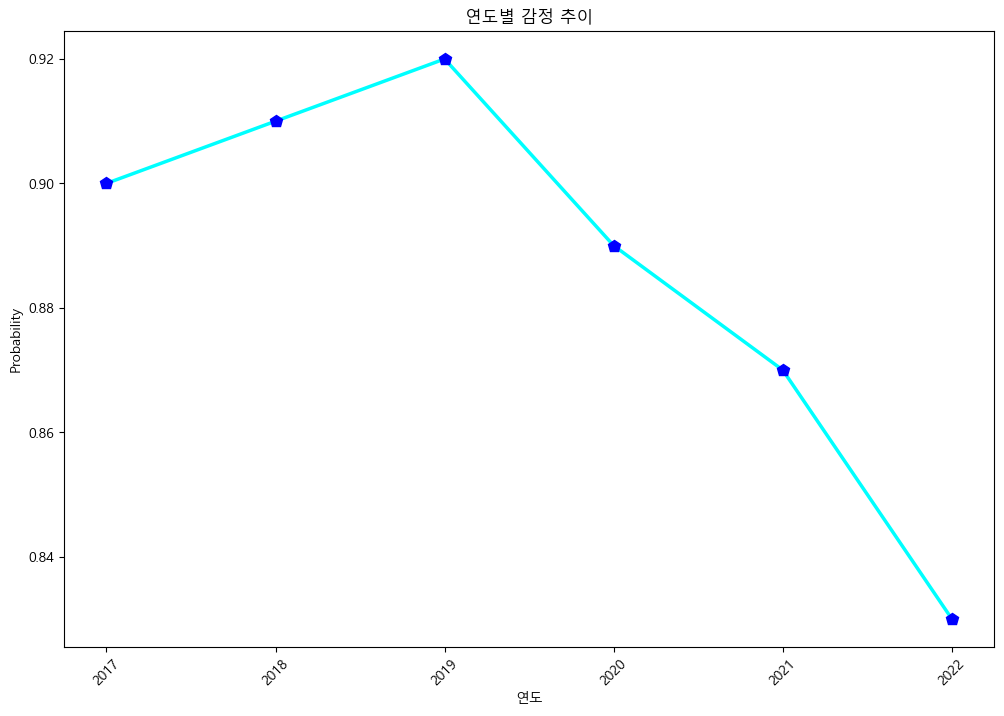

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))  # 그래프 크기 설정
# 선 그래프 그리기
# sns.lineplot(data=df1, x='분기', y='구매건수', marker='o')
plt.plot(ratings['연도'], ratings['Probability'], color='cyan', linestyle='-', linewidth=2.5, marker='p',  markerfacecolor='blue', markeredgecolor='blue', markersize=9.3)
plt.title('연도별 감정 추이')  # 그래프 제목 설정
plt.xlabel('연도')  # x축 레이블 설정
plt.ylabel('Probability')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 눈금 레이블 회전 (필요한 경우)
plt.show()  # 그래프 출력

# 파일 저장

In [26]:
merged_df.to_excel('merged_df.xlsx', index=False)